# ANN Regression Model with Keras Tuner - Walmart Dataset

## Table of Contents

1. [Importing Libraries](#section1)
2. [Data Preparation](#section2)
    - 2.1 [Load and explore the dataset](#section201)<br>
    - 2.2 [Splitting X and Y into training and test dataset](#section202)<br>
    - 2.3 [Feature scaling](#section203)<br>
3. [Creating a base model](#section4)<br>
    - 3.1 [With the random choice of layers and neurons](#section301)<br>
    - 3.2 [Test and evaluate the test data](#section302)<br>
    - 3.3 [Finding MSE and RMSE](#section303)<br>
4. [Using Keras Tuner](#section4)<br>
    - 4.1 [Define a function that creates and returns a Keras model.](#section401)<br>
    - 4.2 [Searching for the best model](#section402)<br>
    - 4.3 [Get the result summary and replicate it in the next model](#section403)<br>
5. [Create a tuned model](#section5)<br>
    - 5.1 [Replicate the best result of the `RandomSearch()` in the last process.](#section501)<br>
    - 5.2 [Test and evaluate it on the test data](#section502)<br>
    - 5.3 [Plot the history of the tuned model](#section503)<br>
6. [Create a callback](#section6)<br>
    - 6.1 [Create a `EarlyStopping()`callback](#section601)<br>
    - 6.2 [Compile the same model and fit it with the callback](#section602)<br>
    - 6.3 [Evaluate and test it again on the test data](#section603)<br>
7. [Conclusion](#section6)<br>

# 1.Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Data Preparation

### 2.1 Load and Explore Dataset

In [2]:
# Load the data
df = pd.read_csv('Walmart.csv')


In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


### Create features and drop irrelevant features (if any)

In [6]:
Y = df['Unemployment']
X = df.drop(['Unemployment','Date'],axis=1)

X.shape, Y.shape

((6435, 6), (6435,))

### 2.2 Splitting X and Y into training and test dataset

In [7]:
# Split the dataset for test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.8, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5148, 6), (5148,), (1287, 6), (1287,))

###  2.3 Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train.shape, x_test.shape

((5148, 6), (1287, 6))

# 3. Create a base model

### 3.1 With the random choice of layers and neurons

In [9]:
# Base model
tf.random.set_seed(42)

base_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=x_test.shape[1]),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

In [10]:
base_model.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(),
                   metrics=["mean_absolute_error"])

In [11]:
base_model.fit(x_train,y_train, epochs=100,validation_split=0.2, verbose=1)

Epoch 1/100
129/129 [==============================] - 6s 5ms/step - loss: 6.2224 - mean_absolute_error: 6.2224 - val_loss: 4.1749 - val_mean_absolute_error: 4.1749
Epoch 2/100
129/129 [==============================] - 0s 3ms/step - loss: 2.4746 - mean_absolute_error: 2.4746 - val_loss: 1.5843 - val_mean_absolute_error: 1.5843
Epoch 3/100
129/129 [==============================] - 0s 3ms/step - loss: 1.4225 - mean_absolute_error: 1.4225 - val_loss: 1.4118 - val_mean_absolute_error: 1.4118
Epoch 4/100
129/129 [==============================] - 0s 3ms/step - loss: 1.3111 - mean_absolute_error: 1.3111 - val_loss: 1.3310 - val_mean_absolute_error: 1.3310
Epoch 5/100
129/129 [==============================] - 0s 3ms/step - loss: 1.2547 - mean_absolute_error: 1.2547 - val_loss: 1.2788 - val_mean_absolute_error: 1.2788
Epoch 6/100
129/129 [==============================] - 0s 3ms/step - loss: 1.2093 - mean_absolute_error: 1.2093 - val_loss: 1.2380 - val_mean_absolute_error: 1.2380
Epoch 7/10

#### 3.2  Make prediction on the test data

In [12]:
base_model_prediction=base_model.predict(x_test)
base_model_prediction

41/41 [==============================] - 0s 1ms/step


array([[8.599121 ],
       [7.944632 ],
       [6.239096 ],
       ...,
       [7.947989 ],
       [7.4602137],
       [6.2088685]], dtype=float32)

#### 3.3 Calculate MSE and RSME

In [13]:
# example of calculate the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, base_model_prediction)
rmse = mean_squared_error(y_test, base_model_prediction, squared=False)
mse, rmse

(1.868179438322607, 1.3668136077470867)

# 4. Using Keras Tuner
KerasTuner is an easy-to-use, scalable hyperparameter optimization framework that solves the pain points of hyperparameter search.

In [14]:
pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 4.0 MB/s eta 0:00:00


In [15]:
from keras_tuner import RandomSearch
from tensorflow.keras import layers

### 4.1 Define a function that creates and returns a Keras model.

Create and return a Keras model using a function, please. When creating a model, specify the hyperparameters using the hp option.

In [16]:
def build_model(hp):
    model = tf.keras.Sequential()
    for i in range(hp.Int("num_layers",2,20)):
        model.add(layers.Dense(units=hp.Int("units_"+str(i),
                              min_value=32,
                              max_value=512,
                              step=32),
                 activation="relu"))
        model.add(layers.Dense(1,activation="linear"))
        model.compile(optimizer=tf.keras.optimizers.Adam(
        hp.Choice("learning_rate",[1e-2,1e-3,1e-4])),
                     loss="mean_absolute_error",
                     metrics=["mean_absolute_error"])
    return model

Initialize a RandomSearch tuner

In [17]:
tuner = RandomSearch(build_model,
                    objective="val_mean_absolute_error",
                    max_trials=5,
                    executions_per_trial=3,
                    directory="ann project1",
                    project_name="tuner_test")

A summary of the tuner we prepared

In [18]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}


### 4.2 Searching for the best model

Start looking for the best model by running the following command.

In [19]:
tuner.search(x_train,
            y_train,
            epochs=100,
            validation_data=(x_test, y_test))

Trial 5 Complete [00h 12m 38s]
val_mean_absolute_error: 0.7054475049177805

Best val_mean_absolute_error So Far: 0.38489888111750287
Total elapsed time: 00h 37m 07s


### 4.3 Get the result summary and replicate it in the next model

Check the result summary, generally it shows 10 best trials

In [20]:
tuner.results_summary()

Results summary
Results in ann project1/tuner_test
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 2 summary
Hyperparameters:
num_layers: 8
units_0: 320
learning_rate: 0.001
units_1: 32
units_2: 128
units_3: 128
units_4: 416
units_5: 160
units_6: 320
units_7: 320
units_8: 128
units_9: 96
units_10: 192
units_11: 96
units_12: 320
Score: 0.38489888111750287

Trial 1 summary
Hyperparameters:
num_layers: 2
units_0: 256
learning_rate: 0.001
units_1: 224
units_2: 160
units_3: 32
units_4: 192
units_5: 96
units_6: 256
units_7: 288
units_8: 448
units_9: 64
units_10: 256
units_11: 64
units_12: 320
Score: 0.4404125114281972

Trial 3 summary
Hyperparameters:
num_layers: 2
units_0: 96
learning_rate: 0.01
units_1: 160
units_2: 320
units_3: 320
units_4: 192
units_5: 64
units_6: 288
units_7: 256
units_8: 32
units_9: 416
units_10: 416
units_11: 480
units_12: 32
Score: 0.45005420843760174

Trial 4 summary
Hyperparameters:
num_layers: 19
units_0: 512
learning_rate:

### Now we will create a model, according to the Keras Tuner

**Hyperparameters**
+ num_layers: (With number of neurons)
+ units_0: 416
+ units_1: 96
+ units_2: 160
+ units_3: 288
+ units_4: 352
+ units_5: 448
+ units_6: 384
+ units_7: 448
+ units_8: 352
+ units_9: 96
+ units_10: 288
+ units_11: 448
+ units_12: 480
+ units_13: 160
+ units_14: 320
+ units_15: 160
+ learning_rate: 0.001

# 5 Create a tuned model.

Based on the keras tuner results.

### 5.1 Replicate the best result of the RandomSearch() in the last process.

In [21]:
tf.random.set_seed(42)

tuned_model = tf.keras.Sequential([
    layers.Input(shape=x_test.shape[1]),
    layers.Dense(416,activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(160, activation="relu"),
    layers.Dense(288, activation="relu"),
    layers.Dense(352, activation="relu"),
    layers.Dense(448, activation="relu"),
    layers.Dense(384, activation="relu"),
    layers.Dense(448, activation="relu"),
    layers.Dense(352, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(288, activation="relu"),
    layers.Dense(448, activation="relu"),
    layers.Dense(480, activation="relu"),
    layers.Dense(160, activation="relu"),
    layers.Dense(320, activation="relu"),
    layers.Dense(160, activation="relu"),
    layers.Dense(1, activation="linear"),
])

tuned_model.compile(loss="mean_absolute_error",
                   optimizer=tf.keras.optimizers.Adam(lr=0.001),
                   metrics=["mean_absolute_error"])

tuned_history = tuned_model.fit(x_test, y_test, epochs=100, validation_split=0.2)

Epoch 1/100
33/33 [==============================] - 5s 16ms/step - loss: 3.1211 - mean_absolute_error: 3.1211 - val_loss: 1.3960 - val_mean_absolute_error: 1.3960
Epoch 2/100
33/33 [==============================] - 0s 12ms/step - loss: 1.4769 - mean_absolute_error: 1.4769 - val_loss: 1.5533 - val_mean_absolute_error: 1.5533
Epoch 3/100
33/33 [==============================] - 0s 12ms/step - loss: 1.4591 - mean_absolute_error: 1.4591 - val_loss: 1.3766 - val_mean_absolute_error: 1.3766
Epoch 4/100
33/33 [==============================] - 0s 12ms/step - loss: 1.2588 - mean_absolute_error: 1.2588 - val_loss: 1.2076 - val_mean_absolute_error: 1.2076
Epoch 5/100
33/33 [==============================] - 0s 12ms/step - loss: 1.1831 - mean_absolute_error: 1.1831 - val_loss: 1.4519 - val_mean_absolute_error: 1.4519
Epoch 6/100
33/33 [==============================] - 0s 12ms/step - loss: 1.2504 - mean_absolute_error: 1.2504 - val_loss: 1.5268 - val_mean_absolute_error: 1.5268
Epoch 7/100
33/3

### 5.2 Test and evaluate it on the test data

#### Make predictions and evaluate the tuned model

In [22]:
# Predictions for tuned model
tuned_model_prediction=tuned_model.predict(x_test)
tuned_model_prediction

41/41 [==============================] - 0s 3ms/step


array([[12.673263 ],
       [ 8.08144  ],
       [ 6.174694 ],
       ...,
       [ 8.3040695],
       [ 7.6240416],
       [ 6.139049 ]], dtype=float32)

In [23]:
# Mean Squared Error
tuned_mse = mean_squared_error(y_test, tuned_model_prediction)
tuned_rmse = mean_squared_error(y_test, tuned_model_prediction, squared=False)
tuned_mse, tuned_rmse

(0.3675311113680568, 0.6062434423299412)

### 5.3 Plot the history of the tuned model

<Axes: >

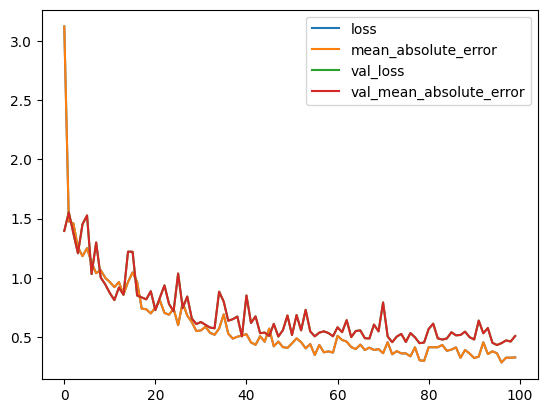

In [24]:
pd.DataFrame(tuned_history.history).plot()

**Observation**

Base Model v/s Tuned Model
+ MSE of Base Model: 2.075377642093114
+ MSE of Tuned Model: 0.4981553588100721

The tuned model is **much** better than the base model

But can from the above plot `pd.DataFrame(tuned_history.history).plot()`, we can notice that the ther a lot of fluctuations going on.
Our model could have come with a better result if it had stopped training at a certain point.

We can achieve this by using callbacks, `EarlyStoppingCallback`. Let's try implementing this on the same model and see if there's any improvement or not.

# 6. Create a callback Model
We will be replicating the same tuned model, but with callback.

### 6.1 Create a EarlyStopping()callback

In [25]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

### 6.2  Compile the same model and fit it with the callback

In [26]:
tuned_model.compile(loss="mean_absolute_error",
                                      optimizer=tf.keras.optimizers.Adam(),
                                      metrics=["mean_absolute_error"])

tuned_model2_history = tuned_model.fit(x_train, y_train,
                                      epochs=100,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
129/129 [==============================] - 5s 9ms/step - loss: 0.5728 - mean_absolute_error: 0.5728 - val_loss: 0.5044 - val_mean_absolute_error: 0.5044
Epoch 2/100
129/129 [==============================] - 1s 8ms/step - loss: 0.4792 - mean_absolute_error: 0.4792 - val_loss: 0.4272 - val_mean_absolute_error: 0.4272
Epoch 3/100
129/129 [==============================] - 1s 8ms/step - loss: 0.4450 - mean_absolute_error: 0.4450 - val_loss: 0.4292 - val_mean_absolute_error: 0.4292
Epoch 4/100
129/129 [==============================] - 1s 8ms/step - loss: 0.4784 - mean_absolute_error: 0.4784 - val_loss: 0.4236 - val_mean_absolute_error: 0.4236
Epoch 5/100
129/129 [==============================] - 1s 7ms/step - loss: 0.4435 - mean_absolute_error: 0.4435 - val_loss: 0.5786 - val_mean_absolute_error: 0.5786
Epoch 6/100
129/129 [==============================] - 1s 7ms/step - loss: 0.4290 - mean_absolute_error: 0.4290 - val_loss: 0.3852 - val_mean_absolute_error: 0.3852
Epoch 7/10

The model stopped at **90 Epochs**. Let's evaluate it on the test data.

### 6.3 Test and evaluate the tuned model with callbacks

In [27]:
# Predictions for tuned model with callback
tuned_model2_prediction=tuned_model.predict(x_test)
tuned_model2_prediction

41/41 [==============================] - 0s 2ms/step


array([[13.1226845],
       [ 8.413308 ],
       [ 6.260011 ],
       ...,
       [ 8.436309 ],
       [ 6.8292437],
       [ 6.108297 ]], dtype=float32)

In [28]:
tuned_mse2 = mean_squared_error(y_test, tuned_model2_prediction)
tuned_rmse2 = mean_squared_error(y_test, tuned_model2_prediction, squared=False)
tuned_mse2, tuned_rmse2

(0.37396890461977134, 0.6115299703365088)

# 7. Conclusion
+ **Base Model**
    + MSE: 2.075377642093114
    + RMSE : 1.44061710460938
+ **Tuned Model**
    + MSE: 0.4981553588100721
    + RMSE : 0.7058012176314745
+ **Tuned Model with Callback**
    + MSE: 0.38007333944919647
    + RMSE : 0.6165008835753575
    
Hence with **Keras Tuner** and **Callbacks** we can improve our model rather than just trying randomly tuning hyperparameters xD